### Investigation - Attempt 1

Looking for nice statistical patterns or distributions of data, using raw data from the CSO. 

This is just a rough investigation, as I have not finalized my intentions for this project.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Investigating SEC Data

#### Leaving Cert Ordinary Level Maths

I took some summary statistics from the State Examinations Commission and put that data into a CSV file. This file contains the 2018 Leaving Cert Higher, Ordinary and Foundation Level results by gender, in Maths and English. I initially compared results in different subjects by gender, before settling on Leaving Cert Ordinary Level Maths. 

I am very familiar with the Leaving Cert Maths course and the factors influencing students attainment. I plan to investigate these factors, and simulate data to determine if my experiences and current research can be modelled effectively.

In [3]:
df = pd.read_csv('data/2018lc-math-english.csv')
y = df.loc[8:15]
y

,Grade,Level,2018-total-maths,2018-female-maths,2018-male-maths,2018-total-eng,2018-female-eng,2018-male-eng
8,1,O,482,314,168,214.0,123.0,91.0
9,2,O,3392,1979,1413,1190.0,634.0,556.0
10,3,O,6484,3524,2960,3086.0,1402.0,1684.0
11,4,O,7551,3981,3570,4163.0,1707.0,2456.0
12,5,O,6348,3260,3088,3328.0,1194.0,2134.0
13,6,O,4062,1948,2114,1811.0,539.0,1272.0
14,7,O,1870,868,1002,667.0,172.0,495.0
15,8,O,1147,436,711,294.0,53.0,241.0


In [159]:
# Creating df for female and male students, and grades
hge = pd.DataFrame(y.loc[:,'2018-female-maths'])
hme = pd.DataFrame(y.loc[:,'2018-male-maths'])
grade = np.array(y.loc[:, 'Grade'])

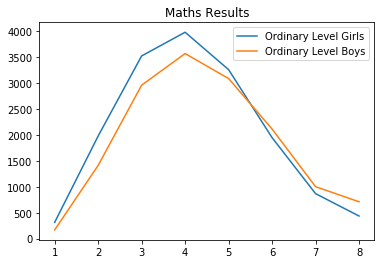

In [5]:
plt.title('Maths Results')
plt.plot(grade, hge, label = 'Ordinary Level Girls')
plt.plot(grade, hme, label = 'Ordinary Level Boys')
plt.legend()
plt.show()

In [6]:
# How many girls sat LCOL in 2018
totalgirl = np.sum(hge)
totalgirl

2018-female-maths    16310
dtype: int64

In [7]:
# How many boys sat LCOL in 2018
totalboy = np.sum(hme)
totalboy

2018-male-maths    15026
dtype: int64

In [139]:
# Total number of LCOL candidates
bestpupil = y.loc[:, '2018-total-maths']
sum_total = np.sum(bestpupil)
sum_total

31336

In [160]:
# Percentage of students achieving each grade
# Note (8 - 15) corresponds to grades (1-8)
print(bestpupil/sum_total*100)

8      1.538167
9     10.824611
10    20.691856
11    24.096885
12    20.257850
13    12.962727
14     5.967577
15     3.660327
Name: 2018-total-maths, dtype: float64


In [15]:
print('Percentage of Students Awarded an O4 or higher grade: ',1.538167+10.824611+20.691856+24.096885)

Percentage of Students Awarded an O4 or higher grade:  57.151519


In [14]:
x = np.arange(0, 8)
bestgirl = (hge.iloc[x])
print(bestgirl/totalgirl*100)

    2018-female-maths
8            1.925199
9           12.133660
10          21.606376
11          24.408338
12          19.987738
13          11.943593
14           5.321888
15           2.673207


In [16]:
print('Percentage of Female Students Awarded an O4 or higher grade: ', 1.925199+12.133660+21.606376+24.408338)

Percentage of Female Students Awarded an O4 or higher grade:  60.073573


In [17]:
bestboy = (hme.iloc[x])
print(bestboy/totalboy*100)

    2018-male-maths
8          1.118062
9          9.403700
10        19.699188
11        23.758818
12        20.551045
13        14.068947
14         6.668441
15         4.731798


In [18]:
print('Percentage of Students Awarded an O4 or higher grade: ', 1.118062+9.403700+19.699188+23.758818)

Percentage of Students Awarded an O4or higher grade:  53.97976800000001


As the data I have here, is ordinal and categorical, I can't calculate the mean. From my percentages above, and the fact my data is ordered by descending grade awards, I can see that the median grade for both female and male is an O4.

In this year approximately 57% of students were awarded an O4 or higher grade. 60% of female students received 04 or higher grades, and 54% of male students. 

## Simulating Data

From my experience working in the education sector, I know that assessment grades are often normally distributed. 

If I assume that the set of Leaving Cert Results are normally distributed, then I would expect my mean, median and mode to have very similar values. In a perfect normal distribution they would be the same, but that would be unlikely to be the case here. So I can use the median O4 grade, observed in my investigation, to make inferences about a possible mean, and use this to generate normally distributed data.

In [181]:
# Generate random female results with mean in the high O4 interval
sim_girls = np.round(np.random.normal(400, 100, 100), decimals = 0)
sim_girls = np.clip(sim_girls, 0, 600)
#Generate random male results with mean in the low O4 interval
sim_boys = np.round(np.random.normal(360, 100, 100), decimals = 0)
sim_boys = np.clip(sim_boys, 0, 600)


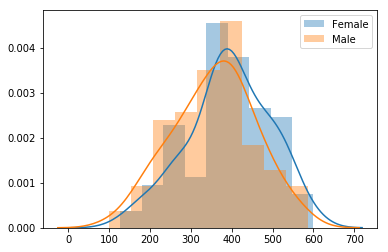

In [182]:
#Graphically display data to look for errors
#Such as results over 600 or under 0
# No fails etc.
sns.distplot(sim_girls, label = 'Female');
sns.distplot(sim_boys, label = 'Male');
plt.legend();


In [183]:
#Adding simulated data to data frame, and then combining in same column
df = pd.DataFrame(sim_girls, columns=['Result'])
df2 = pd.DataFrame(sim_boys, columns=['Result']);
df = df.append(df2, ignore_index=True)

In [184]:
c = pd.cut(
    df.stack(),
    [0, 180, 240, 300, 360,  420, 480, 540, 600],
    labels=['08', 'O7', 'O6', 'O5', 'O4', 'O3', 'O2', 'O1']
)
df2 = pd.DataFrame(df.join(c.unstack().add_suffix('_grade')))
df2 = pd.Series.to_frame(df2.loc[:, 'Result_grade'])

#Reference:https://stackoverflow.com/questions/44659040/pandas-assign-category-based-on-where-value-falls-in-range

In [185]:
# Generating dfs with 100 repeated strings, first female, then male
string_female = pd.DataFrame(['female']*100)
string_male = pd.DataFrame(['male']*100)
# Combining both dfs to the same df column
gender = string_female.append(string_male, ignore_index=True)

In [186]:
# Adding gender col to existing df
df['Gender'] = gender

In [187]:
df

,Result,Gender
0,469.0,female
1,336.0,female
2,438.0,female
3,368.0,female
4,365.0,female
5,248.0,female
6,407.0,female
7,254.0,female
8,485.0,female
9,600.0,female


In [188]:
df = df.join(df2)
df

,Result,Gender,Result_grade
0,469.0,female,O3
1,336.0,female,O5
2,438.0,female,O3
3,368.0,female,O4
4,365.0,female,O4
5,248.0,female,O6
6,407.0,female,O4
7,254.0,female,O6
8,485.0,female,O2
9,600.0,female,O1


In [189]:
sum_cats = df["Result_grade"].value_counts()
perc = sum_cats/200*100
perc

O4    28.0
O5    17.0
O3    14.5
O6    14.0
O2    11.0
O7     7.0
O1     5.0
08     3.5
Name: Result_grade, dtype: float64

In [190]:
girls = df.loc[0:99]
sum_girls = girls["Result_grade"].value_counts()
# As I have 100 data points, my sum is equal to my percentage
sum_girls

O4    30
O5    16
O2    14
O3    14
O6    12
O1     7
O7     5
08     2
Name: Result_grade, dtype: int64

In [191]:
boys = df.loc[100:199]
sum_boys = boys["Result_grade"].value_counts()
# As I have 100 data points, my sum is equal to my percentage
sum_boys

O4    26
O5    18
O6    16
O3    15
O7     9
O2     8
08     5
O1     3
Name: Result_grade, dtype: int64

#### Evaluation

- I initially simulated my female data with a mean of 340 and standard deviation of 100. My male data was simulated with a mean of 315 and the same standard deviation. I ran this simulation several times, and found that my total results showed higher rates of failure and smaller numbers of students achieving the top grades of O1 and O2. Looking at male and female candidates separately I found that both data sets had similar discrepancies. 
- Attempts to adjust this with a higher mean, lead to too many students getting the highest grade O1, while the other grades were more in line with my research.

## References

* [State Examinations Commission - Annual Exams Statistics](https://www.examinations.ie/statistics/?l=en&mc=st&sc=r11)